# Loading libraries

In [366]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

## Scenario

You are working as an analyst with this internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

## Instructions

In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned on the class.

Here is the list of steps to be followed (building a simple model without balancing the data):

- Import the required libraries and modules that you would need.
- Read that data into Python and call the dataframe churnData.
- Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.
- Check for null values in the dataframe. Replace the null values.
- Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
- Scale the features either by using normalizer or a standard scaler.
- Split the data into a training set and a test set.
- Fit a logistic Regression model on the training data.
- Fit a Knn Classifier model on the training data

## Data splitting

### Loading a dataset for classification

In [367]:
# read data
churnData = pd.read_csv("DATA_Customer-Churn.csv")

In [368]:
#check data types for all columns
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [369]:
#convert "TotalCharges" to numeric
churnData["TotalCharges"] = pd.to_numeric(churnData["TotalCharges"], errors='coerce')
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [370]:
#drop null values
churnData.dropna(inplace=True)

#X/Y split
X=churnData.drop("Churn", axis=1)
y=churnData["Churn"]

In [371]:
#get dummies for categorical columns
categoricals_features= X.select_dtypes("object")
cat_cols=pd.get_dummies(categoricals_features, drop_first=True)

In [372]:
#concatenate categorical and numerical dataframes
X = X._get_numeric_data()
X = pd.concat([X,cat_cols],axis=1)

In [373]:
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year
0,0,1,29.85,29.85,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,45,42.30,1840.75,1,0,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1,1,1,1,0,1,...,0,1,0,1,0,1,0,1,1,0
7039,0,72,103.20,7362.90,0,1,1,1,0,0,...,0,1,0,0,0,1,0,1,1,0
7040,0,11,29.60,346.45,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7041,1,4,74.40,306.60,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# Modelling

## Logistic regression

,Error_metric,Train,Test
0,Accuracy,0.809600,0.776830
1,Precision,0.676991,0.650000
2,Recall,0.520054,0.457286


Confusion matrix for the train set
[[3789  365]
 [ 706  765]]


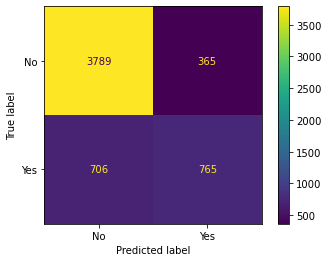



Confusion matrix for the test set
[[911  98]
 [216 182]]


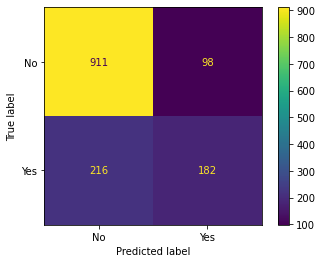

In [374]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

log_model = LogisticRegression() 

#Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)


trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log,pos_label="Yes"),
                                         recall_score(y_train, y_pred_train_log,pos_label="Yes")],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log,pos_label="Yes"),
                                        recall_score(y_test, y_pred_test_log,pos_label="Yes")]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

## KNN Model

,Error_metric,Train,Test
0,Accuracy,0.862222,0.731343
1,Precision,0.768105,0.529412
2,Recall,0.677770,0.452261


Confusion matrix for the train set
[[3853  301]
 [ 474  997]]


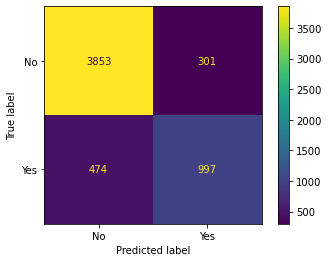



Confusion matrix for the test set
[[849 160]
 [218 180]]


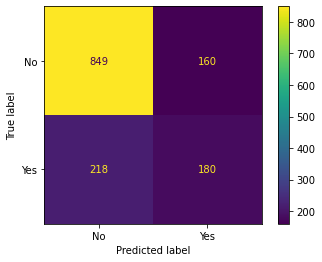

In [375]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)

trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

knn_model.fit(X_train_mod, y_train)

y_pred_train_log = knn_model.predict(X_train_mod)
y_pred_test_log = knn_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log,pos_label="Yes"),
                                         recall_score(y_train, y_pred_train_log,pos_label="Yes")],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log,pos_label="Yes"),
                                        recall_score(y_test, y_pred_test_log,pos_label="Yes")]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(knn_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(knn_model,X_test_mod,y_test, values_format = 'd')
plt.show()

- Fit a Decision Tree Classifier on the training data.
- Check the accuracy on the test data.

## Decision Tree

In [376]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')

,Error_metric,Train,Test
0,Accuracy,0.789511,0.759773
1,Precision,0.653805,0.625000
2,Recall,0.414684,0.376884


Confusion matrix for the train set
[[3831  861]
 [ 323  610]]


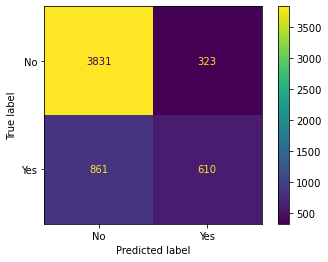



Confusion matrix for the test set
[[919 248]
 [ 90 150]]


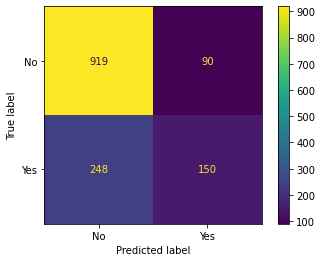

In [377]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Bear in mind that sklearn uses a different function for decision trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
dt = DecisionTreeClassifier(max_depth=3)

dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt, pos_label="Yes"),
                                         recall_score(y_train, y_pred_train_dt, pos_label="Yes")],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt, pos_label="Yes"),
                                        recall_score(y_test, y_pred_test_dt, pos_label="Yes")]})

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

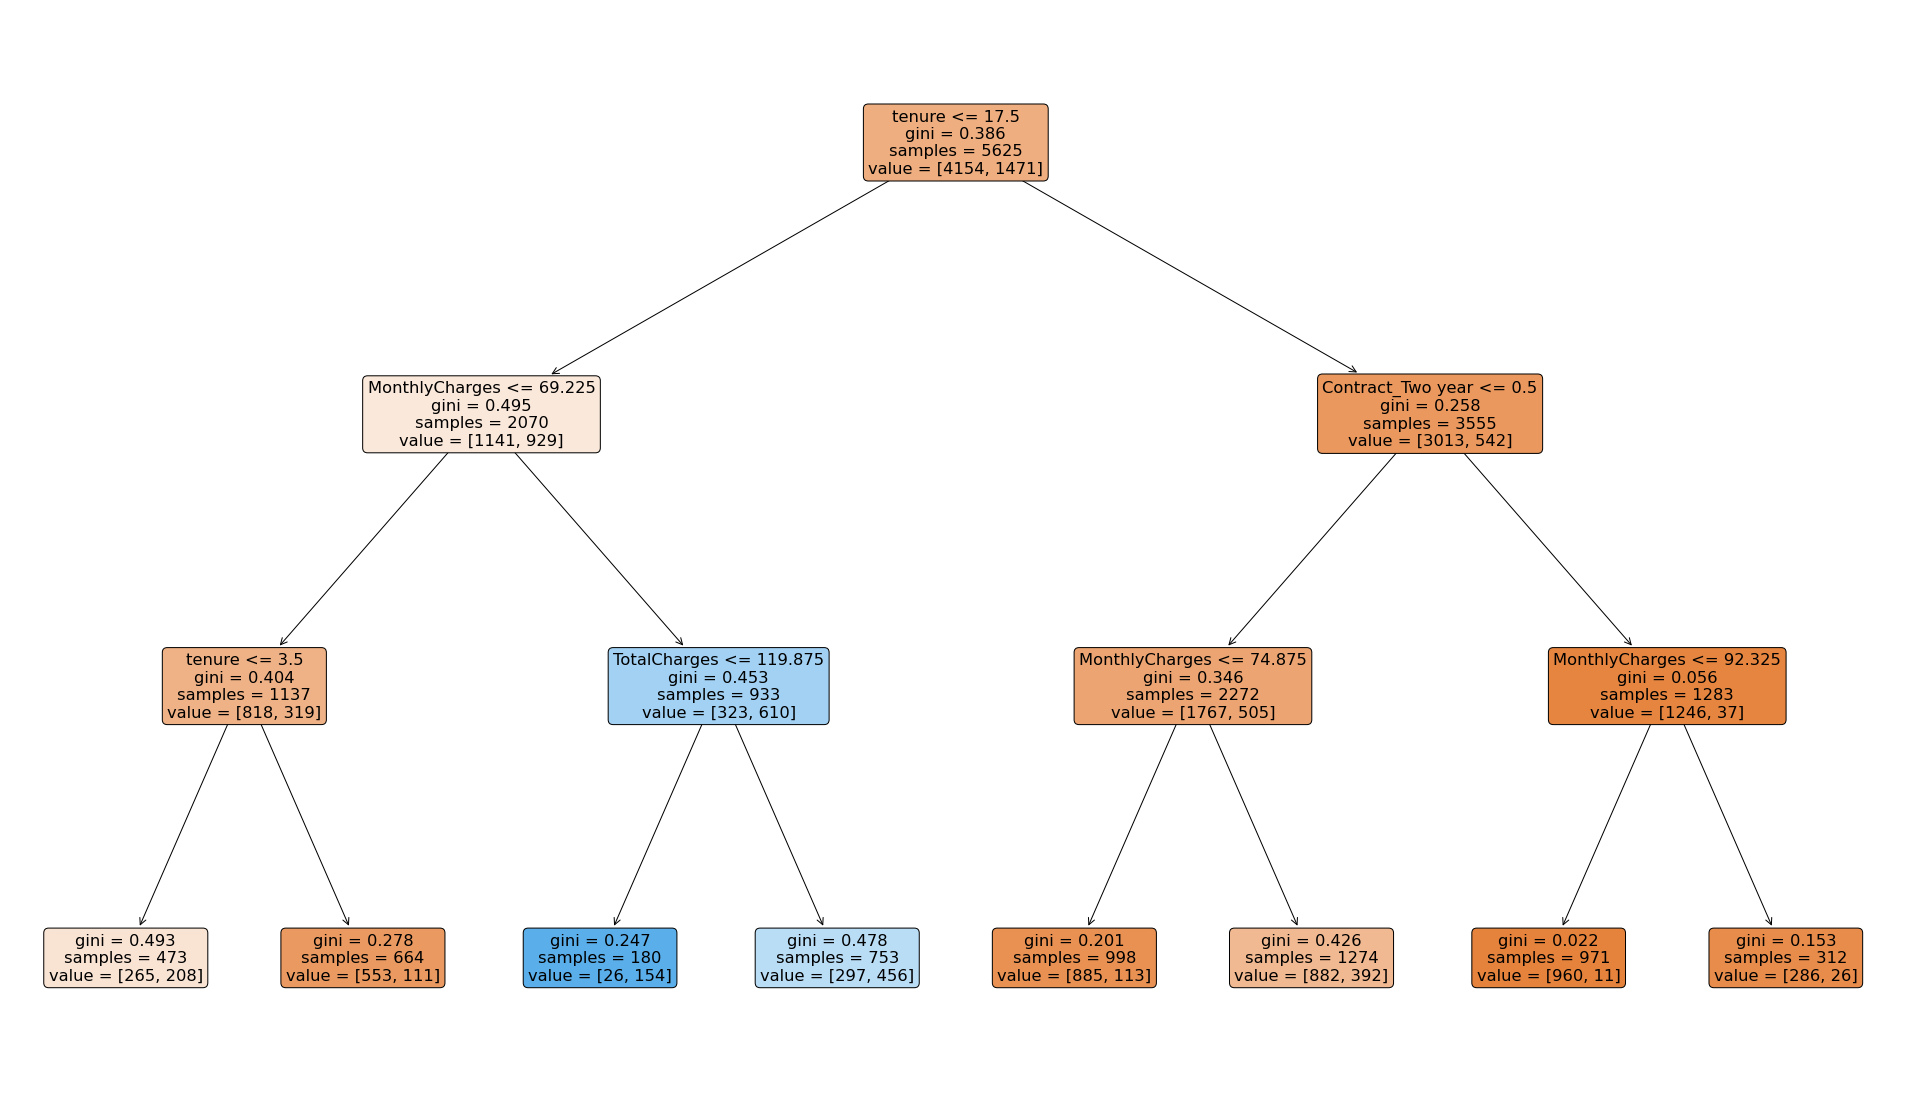

In [378]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(dt,filled = True, rounded=True,feature_names=X.columns)
plt.show() 

# Round 3

- apply K-fold cross validation on your models before and check the model score. Note: So far we have not balanced the data.

## Decision Tree Classifier Cross Validation

In [379]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_boston
from sklearn.datasets import load_iris

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')

In [380]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

print(X_train.shape)
model.score(X_test, y_test)

(5625, 22)


0.7064676616915423

In [381]:
y_test

6466     No
5615    Yes
5344     No
5564     No
588      No
       ... 
5107     No
3220     No
4543     No
3018     No
5661     No
Name: Churn, Length: 1407, dtype: object

In [382]:
scores=cross_val_score(model, X_train, y_train, cv=10)
scores

array([0.74422735, 0.75133215, 0.75666075, 0.73712256, 0.71580817,
       0.75088968, 0.75266904, 0.70818505, 0.72241993, 0.71352313])

In [383]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.74 accuracy with a standard deviation of 0.02


# Managing imbalance in the dataset

- Check for the imbalance.
- Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
- Each time fit the model and see how the accuracy of the model is.

## Model Comparison / K-Fold Cross Validation

In [384]:
model1 = LogisticRegression()

model2 = KNeighborsClassifier()

model3 = DecisionTreeClassifier()


model_pipeline = [model1, model2, model3]
model_names = ['Logistic Regression', 'KNeighborsClassifier', 'DecisionTreeClassifier']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=5))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)

{'Logistic Regression': 0.8028444444444445, 'KNeighborsClassifier': 0.7768888888888889, 'DecisionTreeClassifier': 0.7269333333333333}


## Downsampling

In downsampling, we randomly sample without replacement from the majority class

In [385]:
# read data
Data = pd.read_csv("DATA_Customer-Churn.csv")
#convert "TotalCharges" to numeric
Data["TotalCharges"] = pd.to_numeric(Data["TotalCharges"], errors='coerce')
Data.dtypes
#drop null values
Data.dropna(inplace=True)


In [386]:

category_0 = Data[Data['Churn'] == "No"]
category_1 = Data[Data['Churn'] == "Yes"]

In [387]:
y[y=="No"]

0       No
1       No
3       No
6       No
7       No
        ..
7037    No
7038    No
7039    No
7040    No
7042    No
Name: Churn, Length: 5163, dtype: object

In [388]:
print(category_0.shape)
print(category_1.shape)

(5163, 16)
(1869, 16)


In [389]:
category_0_down = category_0.sample(len(category_1,))
print(category_0_down.shape)
print(category_1.shape)

(1869, 16)
(1869, 16)


In [390]:
y = pd.concat([category_0_down, category_1], axis=0)
#shuffling the data
churnData = churnData.sample(frac=1)
y.value_counts()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  OnlineSecurity       OnlineBackup         DeviceProtection     TechSupport          StreamingTV          StreamingMovies      Contract        MonthlyCharges  TotalCharges  Churn
Male    0              No       No          1       Yes           No internet service  No internet service  No internet service  No internet service  No internet service  No internet service  Month-to-month  20.20           20.20         No       4
                                                                                                                                                                                                                                              Yes      4
                                                                                                                                                                                                                20.10           20.10         Yes      3
Female  0

In [391]:
#X/Y split
X=Data.drop("Churn", axis=1)
y=Data["Churn"]

,Error_metric,Train,Test
0,Accuracy,0.862222,0.731343
1,Precision,0.768105,0.529412
2,Recall,0.677770,0.452261


Confusion matrix for the train set
[[3853  301]
 [ 474  997]]


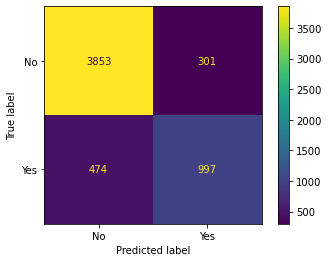



Confusion matrix for the test set
[[849 160]
 [218 180]]


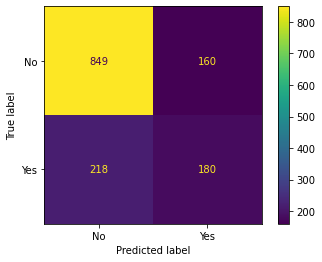

In [392]:
knn_model = KNeighborsClassifier(n_neighbors=3)

trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

knn_model.fit(X_train_mod, y_train)

y_pred_train_log = knn_model.predict(X_train_mod)
y_pred_test_log = knn_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log,pos_label="Yes"),
                                         recall_score(y_train, y_pred_train_log,pos_label="Yes")],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log,pos_label="Yes"),
                                        recall_score(y_test, y_pred_test_log,pos_label="Yes")]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(knn_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(knn_model,X_test_mod,y_test, values_format = 'd')
plt.show()

## Upsampling Method 1

In [393]:
category_1_up = category_1.sample(len(category_0), replace=True)
print(category_1_up.shape)

(5163, 16)


In [394]:
category_1_up

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
5603,Female,0,No,No,1,Yes,Yes,No,No,No,No,No,Month-to-month,48.60,48.60,Yes
7011,Female,0,No,No,4,Yes,Yes,Yes,No,Yes,No,No,Month-to-month,60.40,272.15,Yes
418,Female,0,Yes,Yes,22,Yes,No,Yes,No,No,No,Yes,Month-to-month,83.30,1845.90,Yes
1990,Female,1,No,No,16,Yes,No,No,No,No,Yes,No,Month-to-month,84.75,1350.15,Yes
5317,Female,0,No,No,6,Yes,No,No,No,Yes,No,No,Month-to-month,49.65,267.35,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7026,Female,0,No,No,9,Yes,No,No,No,No,No,No,Month-to-month,44.20,403.35,Yes
5522,Female,0,No,No,1,Yes,No,No,No,No,No,No,Month-to-month,70.15,70.15,Yes
2070,Female,0,No,No,49,Yes,Yes,Yes,No,No,No,No,Month-to-month,59.75,2934.30,Yes
4349,Male,1,Yes,No,1,Yes,Yes,No,No,No,No,No,Month-to-month,80.30,80.30,Yes


In [395]:
category_1_up.shape

(5163, 16)

In [396]:
churnData = pd.concat([category_0, category_1_up], axis=0)
#shuffling the data
churnData = data.sample(frac=1)
churnData["Churn"].value_counts()

Series([], Name: Churn, dtype: int64)

,Error_metric,Train,Test
0,Accuracy,0.789511,0.759773
1,Precision,0.653805,0.625000
2,Recall,0.414684,0.376884


Confusion matrix for the train set
[[3831  861]
 [ 323  610]]


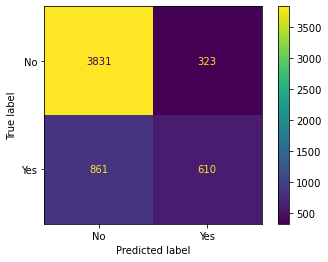



Confusion matrix for the test set
[[919 248]
 [ 90 150]]


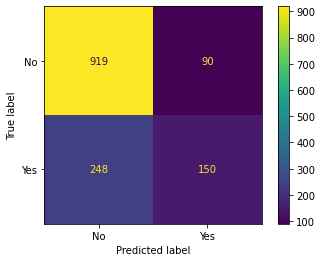

In [397]:
# Bear in mind that sklearn uses a different function for decision trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
dt = DecisionTreeClassifier(max_depth=3)

dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt, pos_label="Yes"),
                                         recall_score(y_train, y_pred_train_dt, pos_label="Yes")],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt, pos_label="Yes"),
                                        recall_score(y_test, y_pred_test_dt, pos_label="Yes")]})

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

## Upsampling using SMOTE

The SMOTE algorithm can be broken down into following steps:

- Randomly pick a point from the minority class.
- Compute the k-nearest neighbors (for some pre-specified k) for this point.
- Add k new points somewhere between the chosen point and each of its neighbors.

In [398]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [399]:
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

ValueError: could not convert string to float: 'Female'

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)

trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

knn_model.fit(X_train_mod, y_train)

y_pred_train_log = knn_model.predict(X_train_mod)
y_pred_test_log = knn_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log,pos_label="Yes"),
                                         recall_score(y_train, y_pred_train_log,pos_label="Yes")],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log,pos_label="Yes"),
                                        recall_score(y_test, y_pred_test_log,pos_label="Yes")]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(knn_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(knn_model,X_test_mod,y_test, values_format = 'd')
plt.show()

In [ ]:
# Bear in mind that sklearn uses a different function for decision trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
dt = DecisionTreeClassifier(max_depth=3)

dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt, pos_label="Yes"),
                                         recall_score(y_train, y_pred_train_dt, pos_label="Yes")],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt, pos_label="Yes"),
                                        recall_score(y_test, y_pred_test_dt, pos_label="Yes")]})

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

In [ ]:
model1 = LogisticRegression()

model2 = KNeighborsClassifier()

model3 = DecisionTreeClassifier()


model_pipeline = [model1, model2, model3]
model_names = ['Logistic Regression', 'KNeighborsClassifier', 'DecisionTreeClassifier']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=5))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)